In [1]:
import numpy
from astropy.io import fits #used to open fits files in which data are stored
import pylab #plotting
import glob
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy.signal
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import medfilt
from scipy.signal import lombscargle 
import scipy.optimize

from scipy import interpolate
from scipy.optimize import curve_fit
from CompSample import conflevels, density_scatter

from functions import import_and_flatten_lightcurve
from functions import fold_lightcurve
from functions import planet_radius
from functions import semi_major_axis
from functions import planet_temperature
from functions import flux_eff

In [3]:
alldata = import_and_flatten_lightcurve()
alldata.head()

,time,flux,error,new flux
0,131.512045,1.000088,0.000141,1.000687
1,131.532480,1.000061,0.000141,1.000557
2,131.552914,0.999893,0.000141,1.000229
3,131.573349,0.999667,0.000141,1.000000
4,131.593783,0.999685,0.000141,1.000004


<ErrorbarContainer object of 3 artists>

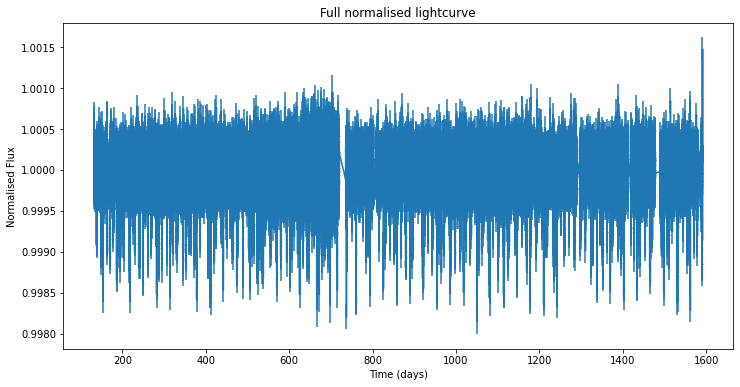

In [4]:
pylab.figure(figsize=(12,6))
pylab.xlabel('Time (days)')
pylab.ylabel('Normalised Flux')
pylab.title('Full normalised lightcurve')
pylab.errorbar(alldata['time'], alldata['new flux'],alldata['error'], ls=None, marker='o', ms=0.5)
#pylab.plot(data['time'], data['new flux'])

In [27]:
def lightcurve_model(t, base_flux, transit_flux):
    "Input: array of time values, numerical guess for base flux and transit flux"
    "Returns: box step model for the transit given the start and end transit time (which differs for each planet) "
    model=np.ones(len(t))
    #period = 22.6 days 
    #t_start = 0.546
    #t_end = 0.55
    #period = 13.0 days 
    #t_start = 0.603
    #t_end = 0.615
    #period = 31 days 
    
    for i in range(0,len(t)):
        if (t[i] > t_start) and (t[i] < t_end):
            model[i] = transit_flux
        else: 
            model[i] = base_flux
    return model 

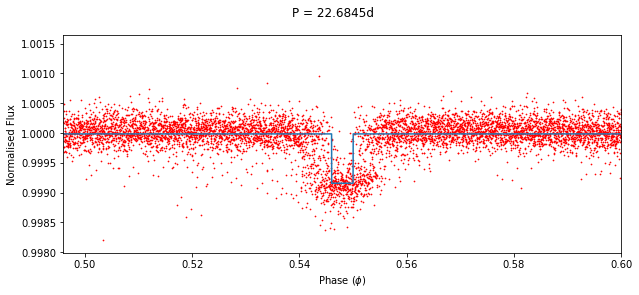

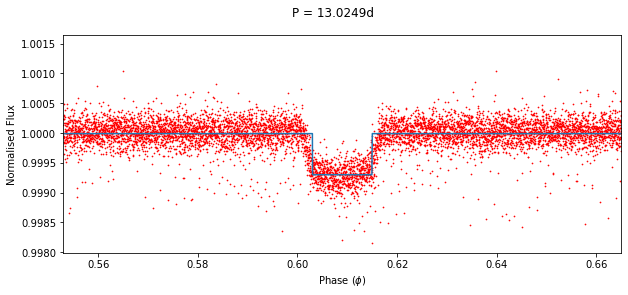

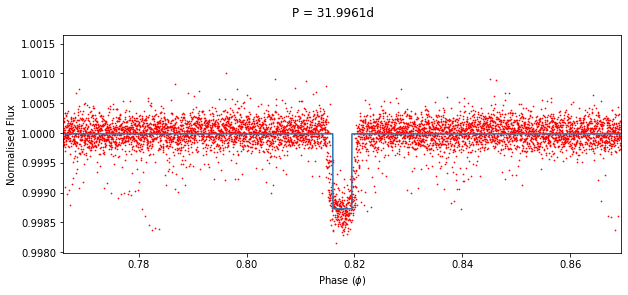

In [28]:
period = [22.6845, 13.0249, 31.9961]
for p in period:
    if p==22.6845:
        t_start = 0.546
        t_end = 0.55
    elif p == 13.0249:
        t_start = 0.603
        t_end = 0.615
    else: 
        t_start = 0.816
        t_end = 0.8195
        
    fold_data = fold_lightcurve('test_fold.csv', p)
    #create new arrays using the folded data 
    x=np.array(fold_data['Phase'])
    y=np.array(fold_data['mag'])
    err=np.array(fold_data['error'])

    popt, pcov = curve_fit(lightcurve_model,x, y, sigma=err,absolute_sigma=True, p0=[1, 0.999])

    pylab.figure(figsize=(10,4))
    pylab.xlim(t_start-0.05, t_end+0.05)
    pylab.plot(x, y, c='r', marker='o',ls='None', ms=0.7)
    model_y = lightcurve_model(x, popt[0], popt[1])
    pylab.plot(x, model_y)

    titletext = 'P = ' + str(np.around(p, decimals=4)) + 'd'
    plt.suptitle(titletext)
    #pylab.title('Normalised flux against phase observed data points compared to simple box model for single transit')
    pylab.xlabel('Phase ($\phi$)')
    pylab.ylabel('Normalised Flux')